In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray

In [2]:
def initU(n,c):
    U=np.random.rand(n,c)
    rsum=U.sum(axis=1)
    NU=U/rsum[:,None]
    return NU

def dist_matf(data,cen):
    DS=data.shape #(nx1)
    CS=cen.shape #(cx1)
    eps=0.001 # epsilon
    #                   (nxc)
    dist=np.zeros((DS[0],CS[0]))
    for i in range(DS[0]): #n
        for j in range(CS[0]): #c
            sum=0
            for k in range(DS[1]): # 1
                sum=sum + (data[i,k]-cen[j,k])**2
            dist[i,j]=sum
    return dist+eps

def nbr_dist_matf(data,cen,padded_img,image):
    height=image.shape[0] #(n')
    width=image.shape[1] #(m')
    DS=data.shape #(nx1)
    CS=cen.shape #(cx1)
    eps=0.001
    nbr_dist_mat = np.zeros((height,width,CS[0])) #(n'xm'xc)
    for i in range(1,height+1):
        for j in range(1,width+1):
            # Extract the 3x3 region
            region = padded_img[i-1:i+2, j-1:j+2]
            for k in range(CS[0]):
                sum=np.sum((region-cen[k])**2)
                nbr_dist_mat[i-1,j-1,k]=sum +eps

    new_nbr_dist_mat=nbr_dist_mat.reshape(height*width,CS[0],order='C') #(nxc)
    return new_nbr_dist_mat

def updateU(data,cen,padded_img,m,alpha,Nr,image):
    dist_mat=dist_matf(data,cen) #(nxc)
    nbr_dist_mat=nbr_dist_matf(data,cen,padded_img,image) #(nxc)
    total_dist=dist_mat+ (alpha/Nr)*nbr_dist_mat #(nxc)
    num=total_dist**(-1/(m-1))
    denom=num.sum(axis=1) #(nx1)
    updatedU=num/denom[:,None] #(nxc) (divdies each column value with sum of memebrship with each centroid)
    return updatedU

def updateV(data,mf,nbr_sum_data,alpha,Nr):
    mf=mf.transpose() #(cxn)
    denom=(1+alpha)*(mf.sum(axis=1)) #(cx1)
    total_dist= data + (alpha/Nr)*nbr_sum_data #(nx1)
    num=np.dot(mf,total_dist) #(cx1)
    cen=num/denom[:,None]
    return cen

def FCM_S(data,nbr_sum_data,c,m,epochs,alpha,Nr,padded_img,image):
    n,d=data.shape
    Uinit=initU(n,c)
    U=Uinit
    olddiff=0.0
    for i in range(epochs):
        mf=U**(m)
        cen=updateV(data,mf,nbr_sum_data,alpha,Nr)
        UNew=updateU(data,cen,padded_img,m,alpha,Nr,image)
        diff=((np.absolute(U-UNew)).sum(axis=1)).sum()
        print("Itteration ", i, "Differnce", diff)
        if (np.absolute(olddiff-diff)<0.01):
          break
        olddiff = diff
        U = UNew
    return U, cen

In [3]:
def nbr_sum_dataf(padded_img,image,data):
    height=image.shape[0]
    width=image.shape[1]
    DS=data.shape
    nbr_sum_image=np.zeros_like(image)
    for i in range(1,height+1):
        for j in range(1,width+1):
            # Extract the 3x3 region
            region = padded_img[i-1:i+2, j-1:j+2]
            sum_value = np.sum(region)
            nbr_sum_image[i-1, j-1]=sum_value

    return nbr_sum_image

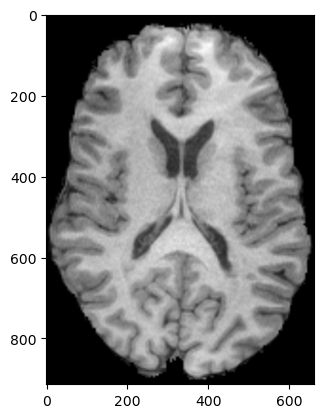

In [11]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
# testimage=img.imread('photoshop_created_image5.png')
testimage=img.imread('brain_mri.jpeg')
plt.imshow(testimage,cmap='gray')
plt.show()

In [5]:
import cv2
img_gray = cv2.cvtColor(testimage, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale Image', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
padded_img=np.pad(img_gray,pad_width=1,mode='constant',constant_values=0)

In [7]:
print(img_gray.shape)

(914, 662)


In [8]:
print(padded_img.shape)

(916, 664)


In [9]:
data = np.ravel(img_gray) #(nx1)
p1 = data.shape[0]
print(p1)
data = np.reshape(data,(p1,1))
nbr_sum_mat=nbr_sum_dataf(padded_img,img_gray,data)
nbr_sum_data=np.ravel(nbr_sum_mat)
p2=nbr_sum_data.shape[0]
print(p2)
nbr_sum_data=np.reshape(nbr_sum_data,(p2,1))
# mean_data=np.reshape(mean_dataf(img_gray),(p,1))
print(data.shape)
print(nbr_sum_data.shape)

605068
605068
(605068, 1)
(605068, 1)


In [16]:
U,Cen = FCM_S(data,nbr_sum_data,c=4,m=2,epochs=100,alpha=0.05,Nr=9,padded_img=padded_img,image=img_gray)

Itteration  0 Differnce 273560.30714624346
Itteration  1 Differnce 4801.831697111477
Itteration  2 Differnce 16602.14673998822
Itteration  3 Differnce 54854.39130755631
Itteration  4 Differnce 144936.9853640638
Itteration  5 Differnce 274911.5904036716
Itteration  6 Differnce 350949.38506972935
Itteration  7 Differnce 235637.57768661354
Itteration  8 Differnce 129315.88803272706
Itteration  9 Differnce 89842.53814105131
Itteration  10 Differnce 54722.02045069573
Itteration  11 Differnce 35412.6464057494
Itteration  12 Differnce 24237.98146037552
Itteration  13 Differnce 16952.040259542668
Itteration  14 Differnce 11846.702261662997
Itteration  15 Differnce 8220.765927209
Itteration  16 Differnce 5667.608396088038
Itteration  17 Differnce 3888.000961154298
Itteration  18 Differnce 2652.909463994888
Itteration  19 Differnce 1802.1073830458292
Itteration  20 Differnce 1219.690510928439
Itteration  21 Differnce 822.8946718964773
Itteration  22 Differnce 553.743173544358
Itteration  23 Diff

In [20]:
Umax = (U == U.max(axis=1)[:,None]).astype(int)
print(Umax.shape)
seg1 = Umax[:,0]
seg1 = np.reshape(seg1,img_gray.shape)
seg2 = Umax[:,1]
seg2 = np.reshape(seg2,img_gray.shape)
seg3 = Umax[:,2]
seg3 = np.reshape(seg3,img_gray.shape)
seg4 = Umax[:,3]
seg4 = np.reshape(seg4,img_gray.shape)
# for i in range(3):
#     seg.append(Umax[:,i])
#     seg[i]=np.reshape(seg[i],img_gray.shape)
# plt.imshow(img_gray,'gray')
# print(data.shape)

(605068, 4)


[]

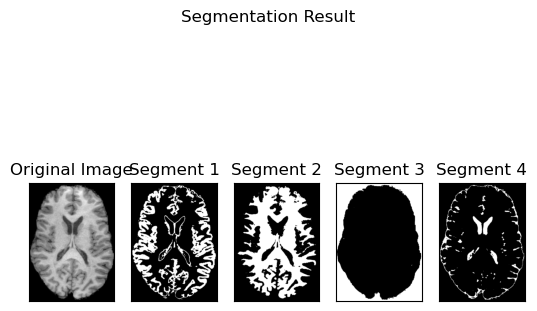

In [21]:
fig, axs = plt.subplots(1,5)
fig.suptitle('Segmentation Result')
axs[0].imshow(testimage,'gray')
axs[0].set_title('Original Image')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(seg1,'gray')
axs[1].set_title('Segment 1')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(seg2,'gray')
axs[2].set_title('Segment 2')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(seg3,'gray')
axs[3].set_title('Segment 3')
axs[3].set_xticks([])
axs[3].set_yticks([])
axs[4].imshow(seg4,'gray')
axs[4].set_title('Segment 4')
axs[4].set_xticks([])
axs[4].set_yticks([])

In [19]:
fig.savefig('FCM_S_ON_BRAIN_MRI_ALPHA=0.5.png', dpi=300, bbox_inches='tight')